1. Carga de datos
2. Exploración de datos: violinplot, boxplot, barplot...
3. Preprocesamiento de los datos: eliminación de caract no necesarias
4. Creación del modelo:
    - Seleccion de k (nº clusters) con método codo (iteración y visualización)
    - Creación columna label (nº de cluster)
5. Visualización de los clusters.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Carga de datos

In [2]:
df_customer = pd.read_csv('Downloads/loan_sanction_train.csv')

In [3]:
df_customer_cluster = pd.read_csv('Downloads/loan_sanction_train.csv')

In [4]:
df_customer_cluster

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


[Text(0.5, 1.0, 'DISTRIBUCIÓN POR PRÉSTAMO')]

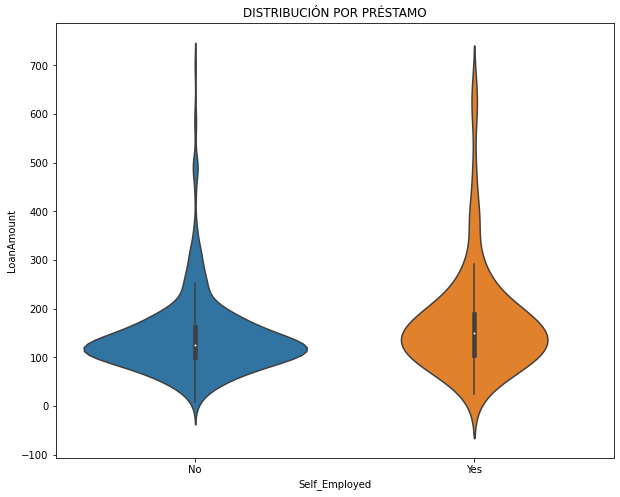

In [37]:
plt.subplots(figsize=(10,8))
sns.violinplot(data=df_customer_cluster, y='LoanAmount', x='Self_Employed').set(title='DISTRIBUCIÓN POR PRÉSTAMO')

ValueError: Grouper and axis must be same length

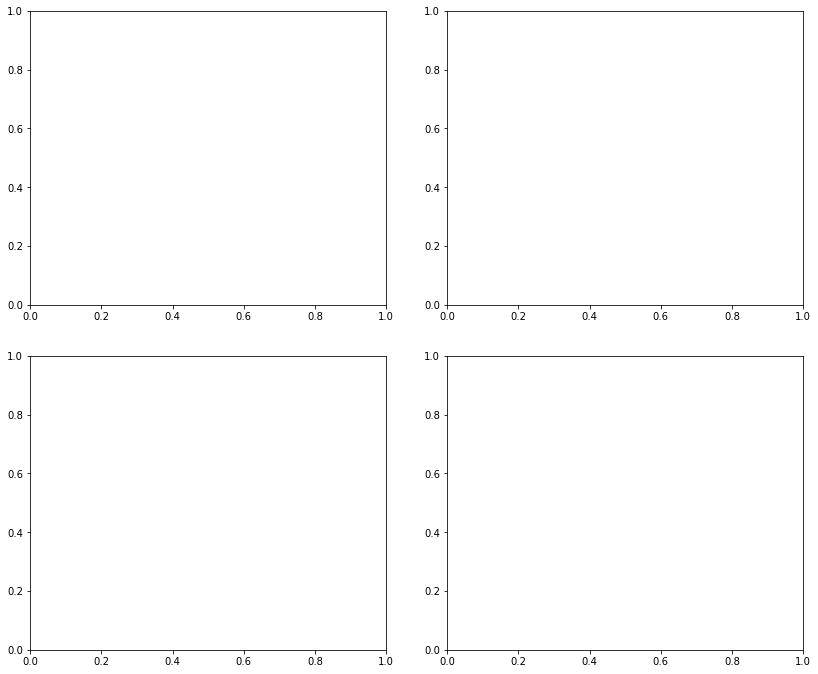

In [38]:
fig, ax = plt.subplots(2,2, figsize=(12,10))

fig.tight_layout(pad=3)

sns.barplot(ax=ax[0,0], x=df_customer_cluster.Gender.unique(), y=df_customer_cluster.Gender.value_counts())
ax[0,0].set(title='DISTRIBUCIÓN POR GÉNERO', ylabel='Cantidad', xlabel='Género')
ax[0,0].grid(axis='y')

sns.barplot(ax=ax[0,1], x=df_customer_cluster.Married.unique(), y=df_customer_cluster.Married.value_counts())
ax[0,1].set(title='DISTRIBUCIÓN POR ESTADO CIVIL', ylabel='Cantidad', xlabel='Estado civil')
ax[0,1].grid(axis='y')

sns.barplot(ax=ax[1,0], x=df_customer_cluster.Education.unique(), y=df_customer_cluster.Education.value_counts())
ax[1,0].set(title='DISTRIBUCÓN POR NIVEL EDUCATIVO', ylabel='Cantidad', xlabel='Nivel educativo')
ax[1,0].grid(axis='y')

sns.barplot(ax=ax[1,1], x=df_customer_cluster.Dependents.unique(), y=df_customer_cluster.Dependents.value_counts())
ax[1,1].set(title='DISTRIBUCIÓN POR PERSONAS A SU CARGO', ylabel='Cantidad', xlabel='Número de personas')
ax[1,1].grid(axis='y')

plt.show()

In [5]:
df_customer

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Limpieza y manipulación de datos

In [6]:
df_customer = pd.get_dummies(df_customer, columns=['Gender', 'Married', 'Education'])

In [7]:
df_customer

,Loan_ID,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate
0,LP001002,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1,1,0,1,0,0,0,1,0
1,LP001003,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,0,1,0,0,1,0
2,LP001005,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,0,1,0
3,LP001006,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,0,0,1
4,LP001008,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1,0,1,0,1,0,0,0,1,0
610,LP002979,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0,1,0,1,0,0,0,1,1,0
611,LP002983,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0,1,0,1,0,1,0,0,1,0
612,LP002984,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0,1,0,1,0,0,1,0,1,0


In [8]:
df_customer.columns

Index(['Loan_ID', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate'],
      dtype='object')

In [9]:
df_customer = df_customer.drop(['Self_Employed', 'Property_Area', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Gender_Female', 'Loan_ID', 'Loan_Status'], axis=1)

In [10]:
df_customer

,ApplicantIncome,LoanAmount,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate
0,5849,NaN,1,0,1,0,0,0,1,0
1,4583,128.0,0,1,0,1,0,0,1,0
2,3000,66.0,0,1,1,0,0,0,1,0
3,2583,120.0,0,1,1,0,0,0,0,1
4,6000,141.0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
609,2900,71.0,1,0,1,0,0,0,1,0
610,4106,40.0,0,1,0,0,0,1,1,0
611,8072,253.0,0,1,0,1,0,0,1,0
612,7583,187.0,0,1,0,0,1,0,1,0


In [11]:
df_customer.columns

Index(['ApplicantIncome', 'LoanAmount', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate'],
      dtype='object')

In [12]:
df_customer.dropna(inplace=True)

In [13]:
df_customer

,ApplicantIncome,LoanAmount,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate
1,4583,128.0,0,1,0,1,0,0,1,0
2,3000,66.0,0,1,1,0,0,0,1,0
3,2583,120.0,0,1,1,0,0,0,0,1
4,6000,141.0,1,0,1,0,0,0,1,0
5,5417,267.0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
609,2900,71.0,1,0,1,0,0,0,1,0
610,4106,40.0,0,1,0,0,0,1,1,0
611,8072,253.0,0,1,0,1,0,0,1,0
612,7583,187.0,0,1,0,0,1,0,1,0


### Exploración de los datos

#### Violinplot

### Selección de datos

In [14]:
df_customer

,ApplicantIncome,LoanAmount,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate
1,4583,128.0,0,1,0,1,0,0,1,0
2,3000,66.0,0,1,1,0,0,0,1,0
3,2583,120.0,0,1,1,0,0,0,0,1
4,6000,141.0,1,0,1,0,0,0,1,0
5,5417,267.0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
609,2900,71.0,1,0,1,0,0,0,1,0
610,4106,40.0,0,1,0,0,0,1,1,0
611,8072,253.0,0,1,0,1,0,0,1,0
612,7583,187.0,0,1,0,0,1,0,1,0


#### StandardScaler

In [15]:
#X = df_customer[['ApplicantIncome']]
#Y = df_customer[['LoanAmount']]

In [16]:
#sc = StandardScaler()
#X = sc.fit_transform(X)

In [17]:
#sc = StandardScaler()
#Y = sc.fit_transform(Y)

In [18]:
#df_customer['ApplicantIncome'] = X

In [19]:
#df_customer['LoanAmount'] = Y

In [20]:
#df_customer

### Creación del modelo

C:\Users\Pablo Hernando\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[Text(0.5, 1.0, 'Método del codo'),
 Text(0.5, 0, 'K value'),
 Text(0, 0.5, 'Inertias')]

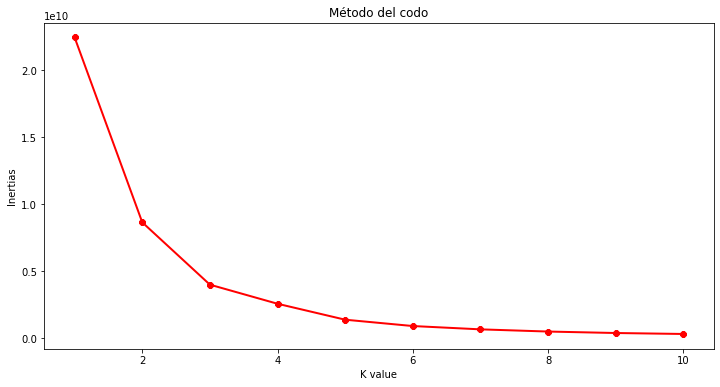

In [21]:
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_customer)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(range(1,11), inertias, linewidth=2, color='red', marker='8')
plt.gca().set(title='Método del codo', xlabel='K value', ylabel='Inertias')

In [27]:
km = KMeans(n_clusters=4)
cluster = km.fit_predict(df_customer)
df_customer['Label'] = cluster
df_customer

,ApplicantIncome,LoanAmount,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Label
1,4583,128.0,0,1,0,1,0,0,1,0,0
2,3000,66.0,0,1,1,0,0,0,1,0,0
3,2583,120.0,0,1,1,0,0,0,0,1,0
4,6000,141.0,1,0,1,0,0,0,1,0,0
5,5417,267.0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,2900,71.0,1,0,1,0,0,0,1,0,0
610,4106,40.0,0,1,0,0,0,1,1,0,0
611,8072,253.0,0,1,0,1,0,0,1,0,0
612,7583,187.0,0,1,0,0,1,0,1,0,0


### Visualización de los clusters

In [28]:
fig = px.scatter_3d(df_customer,
                   x='ApplicantIncome',
                   y='LoanAmount',
                   z='Married_Yes',
                   color='Label',
                   title='Grupos de clientes')

fig.update_layout(autosize=False, width=1000, height=800)


ValueError: Grouper and axis must be same length

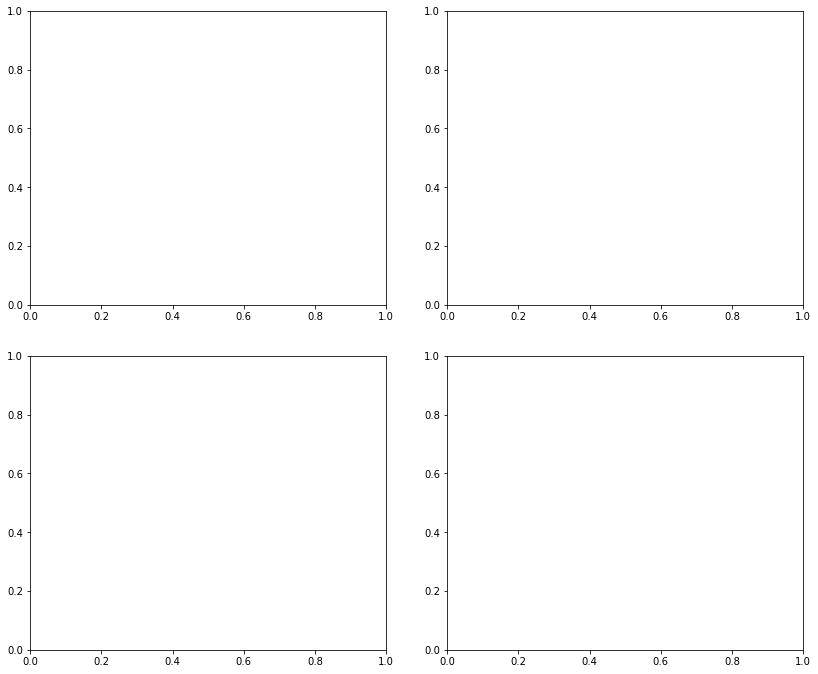